In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 56.1MB/s]


In [21]:
df=pd.read_csv("Jamboree_Admission.csv")

#Performing EDA

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [8]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

##Checking missing values or null values

In [9]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [10]:
print(df.isna().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


####There is nomissing values

###Dropping unwantes columns

In [ ]:
df=df.drop('Serial No.', axis=1)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


###Outliers detection

In [50]:
from scipy import stats
relevant_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
relevant_data = df[relevant_columns]

# Calculate z-scores for each data point
z_scores = stats.zscore(relevant_data)

# Set a threshold for outlier detection
threshold = 3

# Find the indices of outliers
outlier_indices = (z_scores > threshold).any(axis=1)

# Print the outliers
print("Outliers:")
print(df[outlier_indices])

Outliers:
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


###There is no outliers in the dataset

###Univariate Analysis

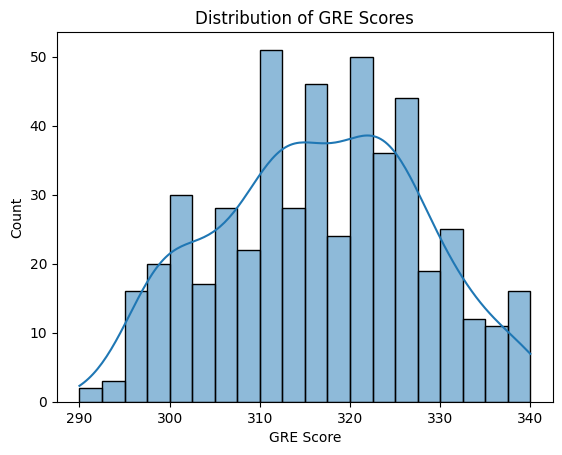

In [ ]:
sns.histplot(data=df, x="GRE Score", bins=20, kde=True)
plt.title("Distribution of GRE Scores")
plt.show()


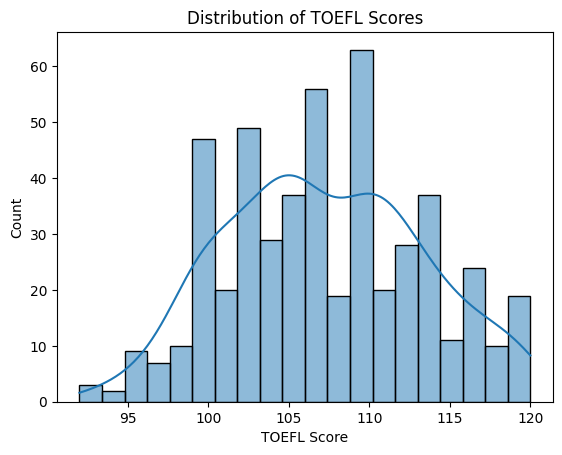

In [ ]:
sns.histplot(data=df, x="TOEFL Score", bins=20, kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

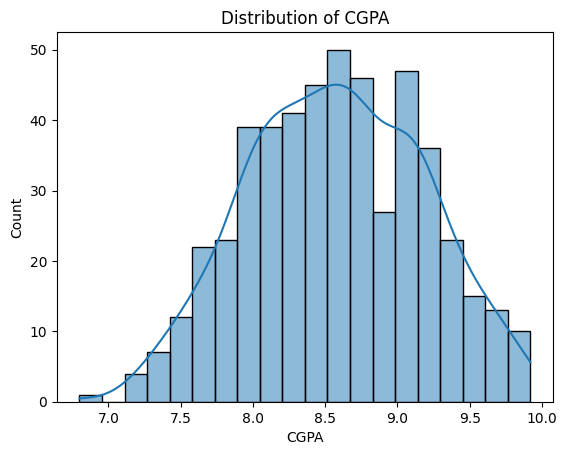

In [ ]:
sns.histplot(data=df, x="CGPA", bins=20, kde=True)
plt.title("Distribution of CGPA")
plt.show()


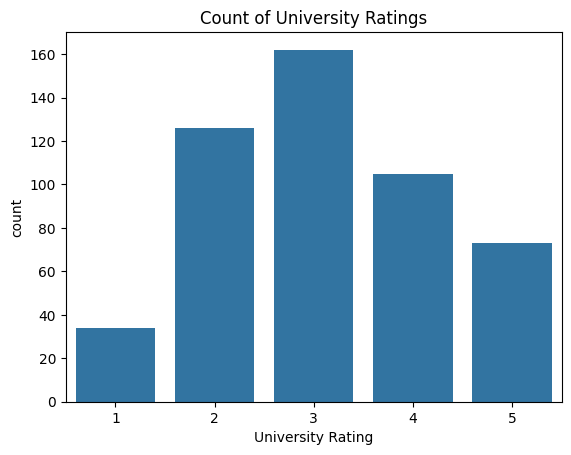

In [ ]:
# Countplot for categorical variable
sns.countplot(data=df, x="University Rating")
plt.title("Count of University Ratings")
plt.show()

###Bivariate Analysis

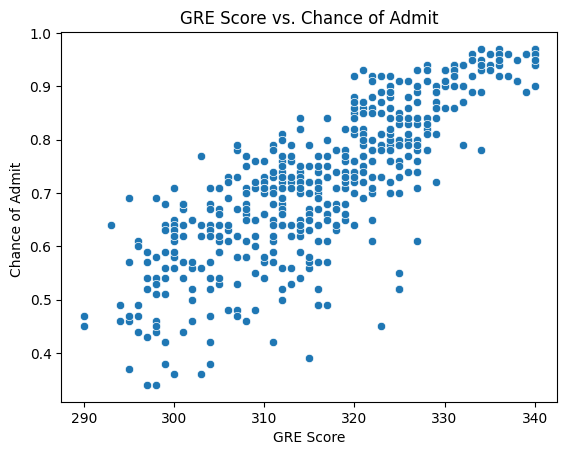

In [45]:
#visualize the relationship between GRE Score and Chance of Admit
sns.scatterplot(data=df, x="GRE Score", y="Chance of Admit ")
plt.title("GRE Score vs. Chance of Admit")
plt.show()

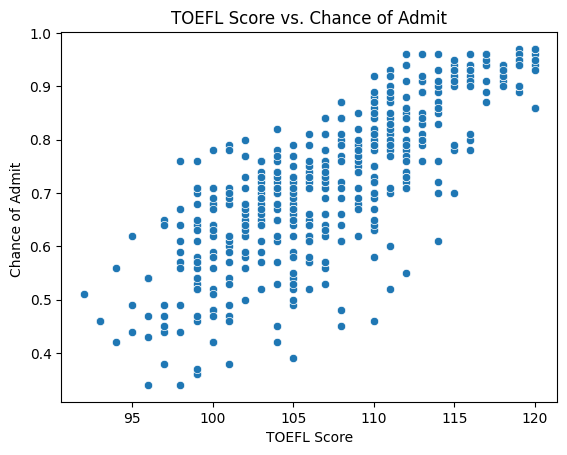

In [46]:
#visualize the relationship between TOEFL Score and Chance of Admit
sns.scatterplot(data=df, x="TOEFL Score", y="Chance of Admit ")
plt.title("TOEFL Score vs. Chance of Admit")
plt.show()

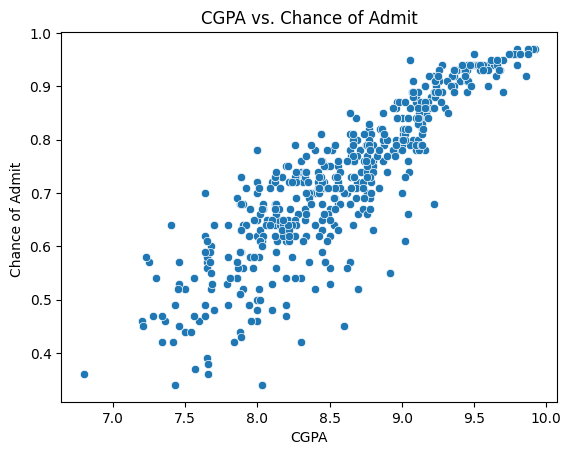

In [47]:
#visualize the relationship between CGPA and Chance of Admit
sns.scatterplot(data=df, x="CGPA", y="Chance of Admit ")
plt.title("CGPA vs. Chance of Admit")
plt.show()

###Chcking duplicated rows

In [ ]:
duplicate = df[df.duplicated()]

print(duplicate)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


#### No duplicate rows are presents

###Correlation detection using heatmap

In [24]:
corr_matrix = df.corr()

In [25]:
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [26]:
mask = corr_matrix.abs() >= 0.90
mask = mask.mask(np.tril(mask, k=-1).astype(bool))

In [27]:
mask

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,True,False,False,False,False,False,False,False,False
GRE Score,False,True,False,False,False,False,False,False,False
TOEFL Score,False,False,True,False,False,False,False,False,False
University Rating,False,False,False,True,False,False,False,False,False
SOP,False,False,False,False,True,False,False,False,False
LOR,False,False,False,False,False,True,False,False,False
CGPA,False,False,False,False,False,False,True,False,False
Research,False,False,False,False,False,False,False,True,False
Chance of Admit,False,False,False,False,False,False,False,False,True


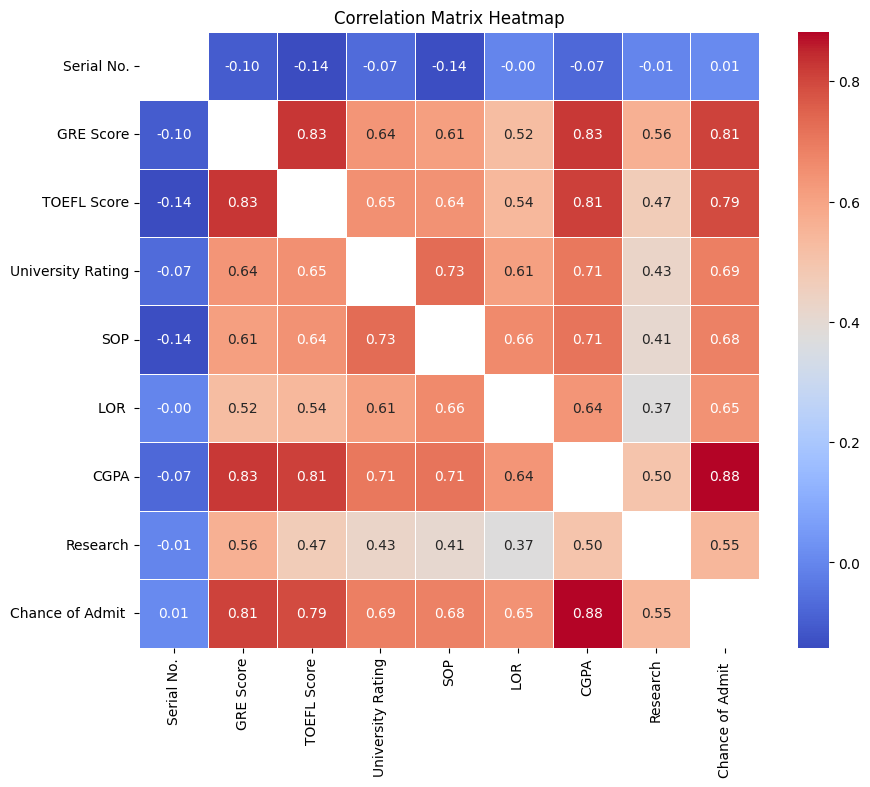

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
high_corr_features = [column for column in mask.columns if any(mask[column])]
df_filtered = df.drop(high_corr_features, axis=1)
print("Dropped features:", high_corr_features)
print("Filtered DataFrame:")
print(df_filtered)

Dropped features: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
Filtered DataFrame:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[500 rows x 0 columns]


In [30]:
df_filtered.shape

(500, 0)

#Build Linear regression model

###Preprocessing(Scalling)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.000000,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.002004,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.004008,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.006012,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.008016,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


###Train-Test-Split

In [14]:
# define X and y
X = df.drop('Chance of Admit ', axis=1)
y = df["Chance of Admit "]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 8) (400,)
(100, 8) (100,)


###Apply OLS algorithm(linear Regression)

In [60]:
# Fit the linear regression model
X_train = sm.add_constant(X_train)  # Add a constant term to the independent variables
model = sm.OLS(y_train, X_train).fit()
ols_predictions = model.predict(sm.add_constant(X_test))
ols_rmse = np.sqrt(mean_squared_error(y_test, ols_predictions))
print("Linear Regression RMSE:", ols_rmse)

Linear Regression RMSE: 0.09061025073115848


In [61]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          3.97e-146
Time:                        16:17:31   Log-Likelihood:                 381.66
No. Observations:                 400   AIC:                            -745.3
Df Residuals:                     391   BIC:                            -709.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0190      0.01

In [58]:
# Lasso Regression
from sklearn.linear_model import Lasso, Ridge
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print("Lasso Regression RMSE:", lasso_rmse)

Lasso Regression RMSE: 0.10792623789758632


In [59]:
# Ridge Regression
ridge_model = Ridge(alpha=0.01)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 0.0906107237621582


#Test the assumptions of linear regression

###1. Multicollinearity check by VIF score

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)

            Features        VIF
0              const  14.566162
1         Serial No.   1.057574
2          GRE Score   4.458906
3        TOEFL Score   4.074641
4  University Rating   2.536705
5                SOP   2.890580
6               LOR    2.041527
7               CGPA   4.880263
8           Research   1.514762


###2. Mean of residuals

In [35]:
residuals = model.resid
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -1.0322298571452392e-15


###3. Linearity of variables (no pattern in residual plot)

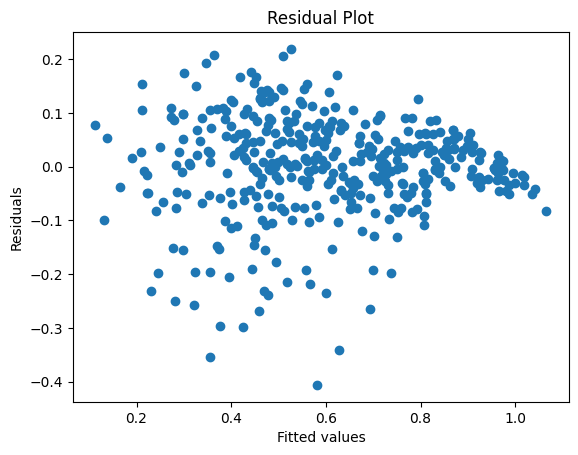

In [36]:
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

###4. Test for Homoscedasticity

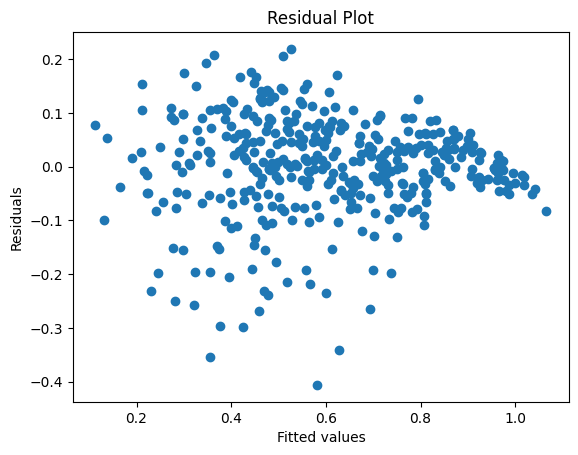

In [37]:
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

###5. Normality of residuals

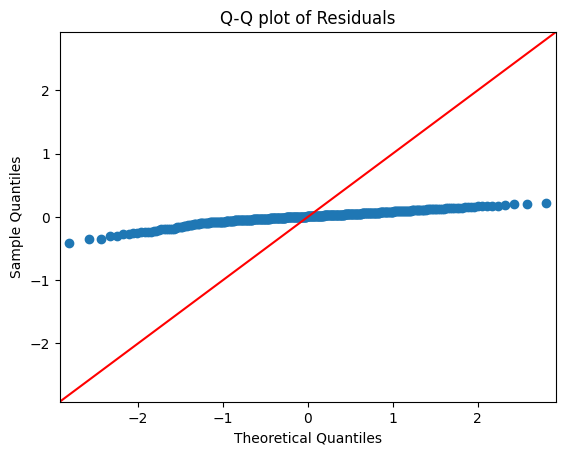

In [38]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q plot of Residuals')
plt.show()

#Prediction Model

In [39]:
X_test = sm.add_constant(X_test)  # Add a constant term to the independent variables in the test set
y_pred = model.predict(X_test)

#Model Evaluation

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)

Mean Absolute Error: 0.06329078315726211
Root Mean Squared Error: 0.09061025073115848
R-squared Score: 0.8114541904694202
Adjusted R-squared Score: 0.7925996095163623


Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.
R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.